In [39]:
#Loading Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Reading Data and dropping some columns
data=pd.read_csv("BikeRental.csv")
data=data.drop(columns="dteday")
data=data.drop(columns="instant")
data=data.drop(columns="holiday")

In [62]:
#convert the datatypes of variables

data['season'] = data.season.astype("category")
data['yr'] = data.yr.astype("category")
data['mnth'] = data.mnth.astype("category")
data['weekday'] = data.weekday.astype("category")
data['workingday'] = data.workingday.astype("category")
data['weathersit'] = data.weathersit.astype("category")
data['temp'] = data.temp.astype(float)
data['casual'] = data.casual.astype(int)
data['atemp'] = data.atemp.astype(float)
data['hum'] = data.hum.astype(float)
data['windspeed'] = data.windspeed.astype(float)
data['registered'] = data.registered.astype(int)
data['cnt'] = data.cnt.astype(int)

In [63]:
#Checking the data
data.head(5)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#missing value analysis

#Here we are checking the count of missing values in each variable

missing_val=pd.DataFrame(data.isnull().sum())

In [43]:
#Checking the Count
missing_val

,0
season,0
yr,0
mnth,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0
windspeed,46


In [64]:
#Checking the dimensions of the data
data.shape

(731, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce12d57f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce12d5e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce12d5400>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce12eb550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce12eb898>],
 'means': []}

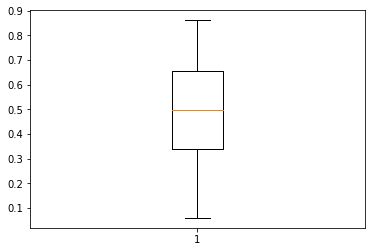

In [8]:
#Outlier Analysis
#Finding outliers using boxplot

plt.boxplot(data["temp"])
#As we have no outliers we proceed to next variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce136f4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce136fb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce1365d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce136ff98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce1378588>],
 'means': []}

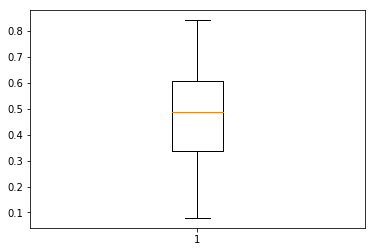

In [9]:
plt.boxplot(data["atemp"])
#As we have no outliers we proceed to next variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce13ccac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce13ccef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce13cc6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce13d5828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce13d5b70>],
 'means': []}

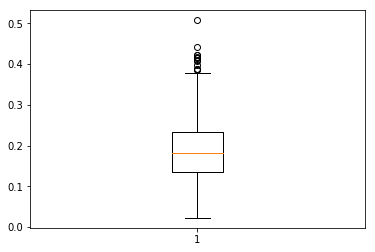

In [10]:
#Before removing outliers the windspeed variable is 
plt.boxplot(data["windspeed"])
#As we have outliers we have to take note of this variable and proceed to next variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce142d5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce142dc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce1421e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce1436320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce1436668>],
 'means': []}

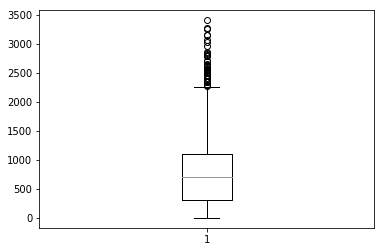

In [11]:
plt.boxplot(data['casual'])
#As we have outliers we have to take note of this variable and proceed to next variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce148d748>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce148ddd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce1482fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce14944a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce14947f0>],
 'means': []}

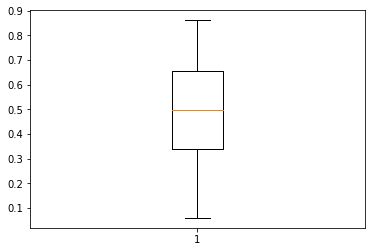

In [12]:
plt.boxplot(data["temp"])
#As we have no outliers we proceed to next variable

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce14e7dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce14f04a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce14e79e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce14f0b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce14f0e80>],
 'means': []}

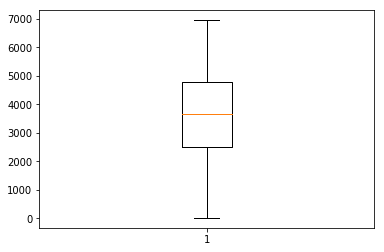

In [13]:
plt.boxplot(data["registered"])
#As we have no outliers we proceed to next task of removing the outliers

In [65]:
#Here we are going to calculate the percentiles i.e 25,50,75 and calculate the outer regions and remove 
#the outliers that are present outside the regions

#calculating 75th and 25th percentile
q75,q25=np.percentile(data['windspeed'],[75,25])
print(q75,q25)
#calculating 50th percentile
iqr= q75-q25
iqr
#calculating inner and outer fence
min1=q25-(iqr)
max1=q75+(iqr)
print(min1,max1)
data.loc[data['windspeed']<min1,'windspeed']=np.nan
data.loc[data['windspeed']>max1,'windspeed']=np.nan

0.2332145 0.13495
0.03668549999999998 0.33147899999999997


In [66]:
#calculating 75th and 25th percentile
q75,q25=np.percentile(data['casual'],[75,25])
print(q75,q25)
#calculating 50th percentile
iqr= q75-q25
iqr
#calculating inner and outer fence
min1=q25-(iqr)
max1=q75+(iqr)
print(min1,max1)
data.loc[data['casual']<min1,'casual']=np.nan
data.loc[data['casual']>max1,'casual']=np.nan

1096.0 315.5
-465.0 1876.5


In [67]:
#checking the no of missing values after making the outlier values NULL, You can refer to missing value analysis done above to
# Check the missing values for each variable that we have done previously

missing_val=pd.DataFrame(data.isnull().sum())
missing_val

,0
season,0
yr,0
mnth,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0
windspeed,46


In [68]:
#Setting the best fitted method for filling the NULL values.
data['windspeed']=data['windspeed'].fillna(data['windspeed'].mean())
data['casual']=data['casual'].fillna(data['casual'].mean())

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce4493860>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce4493ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce4493470>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce449d5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce449d908>],
 'means': []}

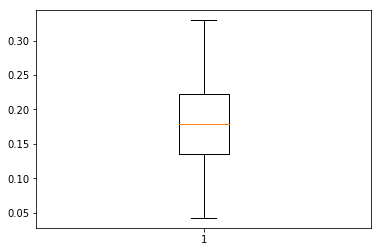

In [69]:
#After doing outlier analysis the windspeed variable is 
plt.boxplot(data["windspeed"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fce15b2978>,
 'caps': [<matplotlib.lines.Line2D at 0x1fce15b2da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fce15b2588>],
 'medians': [<matplotlib.lines.Line2D at 0x1fce15ba6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fce15baa20>],
 'means': []}

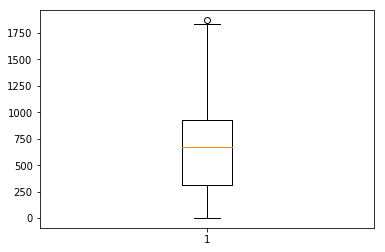

In [19]:
#After doing outlier analysis the casual variable is 
plt.boxplot(data["casual"])

In [46]:
#Now we have to do the feature selection :

#correlation plot for numerical variables
num_cnames=['registered','casual','windspeed','hum','atemp','temp','cnt']
df_corr=data.loc[:,num_cnames]

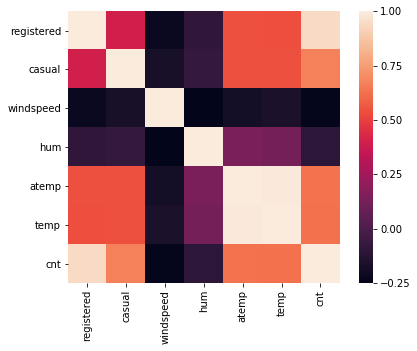

In [47]:
#set width and height of the plot
f,ax=plt.subplots(figsize=(7,5))

#generate co-relation matrix
corr=df_corr.corr()

#plotting

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),square=True,ax=ax)

In [70]:
#here we can see that Both windspeed and hum are not having high relation with cnt i.e our dependent variable so, lets's 
#drop those two variables

data=data.drop(columns="windspeed")
data=data.drop(columns="hum")

In [71]:
#Checking the number of variables after removal
data.shape

(731, 11)

In [72]:
#Checking the data
data.head(5)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
0,1,0,1,6,0,2,0.344167,0.363625,331.0,654,985
1,1,0,1,0,0,2,0.363478,0.353739,131.0,670,801
2,1,0,1,1,1,1,0.196364,0.189405,120.0,1229,1349
3,1,0,1,2,1,1,0.200000,0.212122,108.0,1454,1562
4,1,0,1,3,1,1,0.226957,0.229270,82.0,1518,1600


(array([  7.,  27.,  53.,  57.,  37.,  65.,  95., 101.,  78.,  51.,  48.,
         64.,  38.,  10.]),
 array([  22.        ,  642.85714286, 1263.71428571, 1884.57142857,
        2505.42857143, 3126.28571429, 3747.14285714, 4368.        ,
        4988.85714286, 5609.71428571, 6230.57142857, 6851.42857143,
        7472.28571429, 8093.14285714, 8714.        ]),
 <a list of 14 Patch objects>)

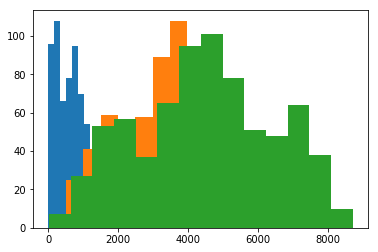

In [51]:
#performing feature scaling
df=data.copy()
num_cnames=['registered','casual','windspeed','hum','atemp','temp','cnt']
#normality check

plt.hist(data['casual'],bins='auto')
plt.hist(data['registered'],bins='auto')
plt.hist(data['cnt'],bins='auto')

In [73]:
# Performing normalization: 
cnames=['registered','casual','cnt']

for i in cnames:
    print(i)
    data[i]=(data[i]-np.min(data[i]))/(np.max(data[i])-np.min(data[i]))

registered
casual
cnt


In [74]:
#Sampling:

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [75]:
#Checking the No of Rows and columns of the train and test datasets
test.shape

(147, 11)

In [76]:
train.shape

(584, 11)

In [77]:
#Checking both the top 5 rows and columns
train.head(5)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
308,4,0,11,6,0,1,0.326667,0.323854,0.618104,0.397055,0.449149
137,2,0,5,3,1,2,0.550000,0.527158,0.286020,0.476321,0.440980
670,4,1,11,4,1,2,0.365833,0.369942,0.248527,0.794109,0.686148
67,1,0,3,3,1,2,0.295833,0.286608,0.101232,0.242564,0.215025
433,1,1,3,5,1,2,0.410833,0.397083,0.238350,0.592261,0.523125


In [31]:
test.head(5)

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,casual,registered,cnt
281,4,0,10,0,0,1,0.540833,0.523983,0.358667,0.446722,0.631500
211,3,0,7,0,0,1,0.805833,0.729796,0.815212,0.398210,0.492407
16,1,0,1,1,0,2,0.175833,0.176771,0.061596,0.124603,0.112517
363,1,0,12,5,1,1,0.311667,0.318812,0.261918,0.359226,0.342499
462,2,1,4,6,0,1,0.437500,0.426129,0.358667,0.517615,0.786355


In [78]:
#Now we are making a copy of train and test datasets for future use
train_copy=train
test_copy=test

In [79]:
#Now using machine learning models let's predict the values: 

#Decision tree

from sklearn.tree import DecisionTreeRegressor
fit = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:9],train.iloc[:,10])
predictions_Dt=fit.predict(test.iloc[:,0:9])

In [80]:
#Now calculating Mape for Decision tree regressor

def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))
    print(mape)
MAPE(test.iloc[:,10],predictions_Dt)

#Error % = 35%
#Accuracy % = 65%

0.35889469126423207


In [85]:
#Linear regression

import statsmodels.api as sm
model=sm.OLS(train.iloc[:,10].astype(float),train.iloc[:,0:9].astype(float)).fit()
predictions_lm=model.predict(test.iloc[:,0:9])

In [86]:
#Calculating Mape for Linear regression on the data
def MAPE(y_true,y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))
    print(mape)
MAPE(test.iloc[:,10],predictions_lm)

#Error % = 19%
#Accuracy % = 81%

0.19966916340957316


In [ ]:
#We conclude that linear regression is providing more accuarcy i.e 84% So, we are considering the linear regression 
# to use for our future datasets.